# OpenCV-Python

### （1）颜色转换

颜色空间的转换，颜色转换函数是cv2.cvtColor()。

常见色彩空间包括GRAY、XYZ、YCrCb、HSV、HLS、CIEL*a*b*、CIEL*u*v*、Bayer。
人眼视觉系统（HVS, Human Visual System）对颜色的敏感度要低于对亮度的敏感度。
在传统的RGB色彩空间内，RGB三原色具有相同的重要性，但是忽略了亮度信息。
在YCrCb色彩空间中，Y代表光源的亮度，Cr表示红色分量信息，Cb表示蓝色分量信息。
HSV（色调hue，饱和度saturation，亮度value）是面向视觉感知的颜色模型。
色调是指光的颜色，饱和度是指色彩的深浅程度。
H（hue）、L（lightness，明度）、S（saturation）
CIEL*a*b*中的L*表示亮度，a*表示从红色到绿色的范围，b*表示从黄色到蓝色的范围。
CIEL*u*v*色彩空间同CIEL*a*b*色彩空间一样，都是均匀的颜色模型。
Bayer色彩空间（Bayer模型）被广泛地应用在CCD和CMOS相机中。

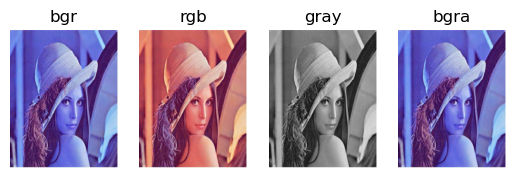

In [18]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("lena.jpg")  # OpenCV默认原始图像是BGR格式
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)  # BGR转gray
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # BGR转RGB
bgra_img = cv.cvtColor(img, cv.COLOR_BGR2BGRA)  # BGR转换为BGRA，A是透明度。
b, g, r, a = cv.split(bgra_img)

# 以子图的方式显示图像
plt.subplot(1, 4, 1), plt.title("bgr"), plt.axis("off")
plt.imshow(img)
plt.subplot(1, 4, 2), plt.title("rgb"), plt.axis("off")
plt.imshow(rgb_img)
plt.subplot(1, 4, 3), plt.title("gray"), plt.axis("off")
plt.imshow(gray_img, cmap="gray")  # cmap参数表示以灰度图显示
plt.subplot(1, 4, 4), plt.title("bgra"), plt.axis("off")
plt.imshow(bgra_img)
plt.show()

### （2）位平面分解、图像加密解密和数字水印。

位平面分解原理介绍：

8个比特位的灰度图像按照比特位可分为8个位平面，每个平面是二进制图像。
在8位灰度图中，每一个像素使用8位二进制值来表示，其值的范围在[0,255]之间。
位平面按低位到高位分别为2的0次方、2的1次方、2的平方，直到2的7次方。
8位灰度图由这8个位平面加权组合，权重从低到高。
将图像的像素值表示为8位二进制，取对应位置的二进制值组成对应的位平面
比如灰度图像像素值是2和3，其对应的8位二进制就是00000010和00000011,
8个（0~7）位平面就分别是01、11、00、00、00、00、00、00。
将彩色图像每个通道相同的位平面组合可得到新的彩色图像，比如组合B,G,R的第三位平面。

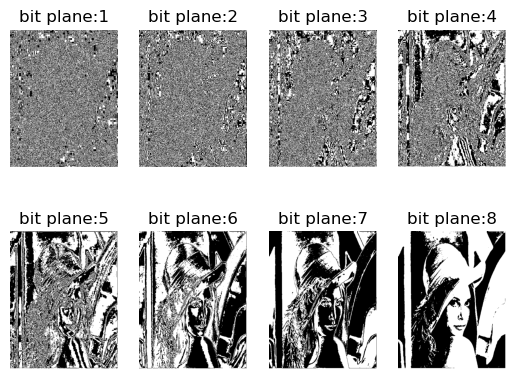

In [32]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

gray = cv.imread("lena.jpg", 0)  # 读取灰度图
row, col = gray.shape  # 获取灰度图的行、列大小，用来生成按位与操作的模板
x = np.zeros((row, col, 8), dtype=np.uint8)  # 生成8通道的0矩阵

for i in range(8):
    x[:, :, i] = 2**i  # 将0矩阵的8个通道变为1，2,3,4到7,8，

# r矩阵用来储存按位与操作之后的结果。
r = np.zeros((row, col, 8), dtype=np.uint8)

for i in range(8):
    # 灰度图gray分别和x的8个通道执行按位与操作，并赋值给r。
    r[:, :, i] = cv.bitwise_and(gray, x[:, :, i])

    # 将大于0的像素值变为255，方便查看，不然像素值过低视觉效果是一团黑。
    mask = r[:, :, i] > 0
    r[mask] = 255

    plt.subplot(2, 4, i + 1), plt.title("bit plane:" + str(i + 1)), plt.axis("off")
    # 设置cmap="gray"，以灰度图显示二值图像，不然图像是彩色。
    plt.imshow(r[:, :, i], cmap="gray")

图像加密解密原理：

通过按位异或运算可以实现图像的加密和解密。
通过对原始图像与密钥图像进行按位异或，可以实现加密；
将加密后的图像与密钥图像再次进行按位异或，可以实现解密。

位运算是指针对二进制位进行的运算，利用位运算即可实现对像素点的加密。
在图像处理中，需要处理的像素点的值通常为灰度值，其范围通常为[0,255]。
例如，某个像素点的值为2（明文,表示为二进制是10），使用1（二进制是01）作为密钥对其进行加密，让这两个数的二进制值进行按位异或运算，即完成加密，得到一个密文3（二进制是11）。
当需要解密时，将密文3与密钥1进行按位异或运算，即可得到原始像素点值2（明文）。

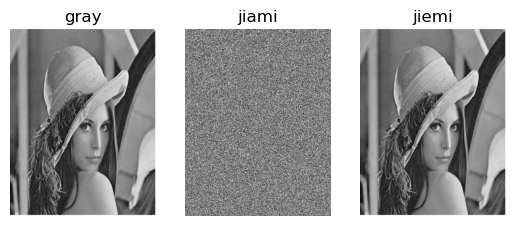

In [34]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# 灰度图
gray = cv.imread("lena.jpg", 0)
row, col = gray.shape
# 密钥
key = np.random.randint(0, 256, size=(row, col), dtype=np.uint8)
# 对灰度图加密，按位异或。
jiami_img = cv.bitwise_xor(gray, key)
# 将加密图解密，按位异或。
jiemi_img = cv.bitwise_xor(jiami_img, key)

plt.subplot(1, 3, 1), plt.title("gray"), plt.axis("off")
plt.imshow(gray, cmap="gray")
plt.subplot(1, 3, 2), plt.title("jiami"), plt.axis("off")
plt.imshow(jiami_img, cmap="gray")
plt.subplot(1, 3, 3), plt.title("jiemi"), plt.axis("off")
plt.imshow(jiemi_img, cmap="gray")
plt.show()